# Building first deep neural network - introduction to backpropagation

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def relu(x):
    return (x > 0) * x

def relu2deriv(output):
    return output > 0

In [17]:
streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1]])

walk_vs_stop = np.array([[1, 1, 0, 0]]).T

array([[1, 0, 1]])

Error 10: 0.6386759943431365
Error 20: 0.051887959674803
Error 30: 0.0010473031768630952
Error 40: 7.40777305983761e-05
Error 50: 5.186945974451857e-06
Error 60: 3.7761129855365223e-07


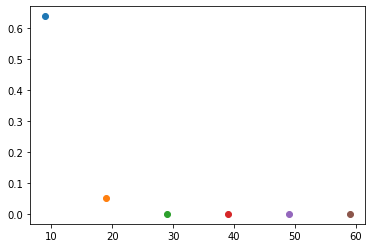

In [65]:
alpha = 0.2
hidden_size = 4

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1

epochs = 60

for e in range(epochs):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

        layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

    if (e+1) % 10 == 0:
        print(f"Error {e+1}: {layer_2_error}")
        plt.scatter(e, layer_2_error)